In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [97]:
#df = pd.read_csv('winequality-re.csv')

In [98]:
with open('winequality-white.txt') as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines[1:]:
        newLine = line.strip().split()
        newLines.append( newLine )



In [99]:
columns = lines[0]
columns = columns.replace('"','')
columns= columns.replace('\n','')
columns = columns.split(';')

In [100]:
file = open('winequality.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(columns)

In [101]:
for to_append in newLines:
    file = open('winequality.csv', 'a', newline='')
    with file:
        writer = csv.writer(file, dialect='excel')
        writer.writerow(to_append[0].split(';'))

In [102]:
df = pd.read_csv('winequality.csv')

In [103]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [104]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [105]:
df.drop_duplicates(inplace=True)

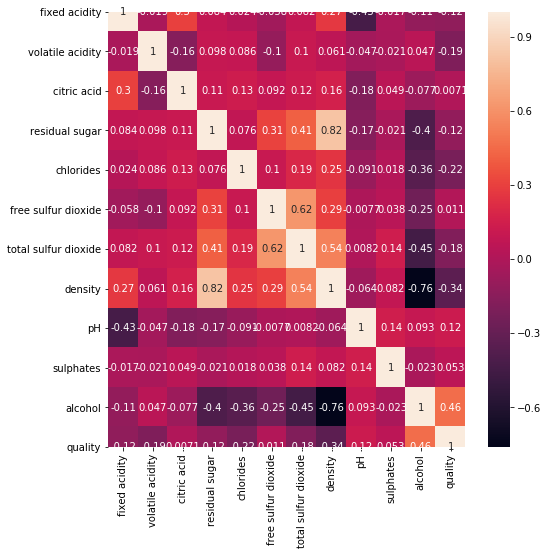

In [106]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

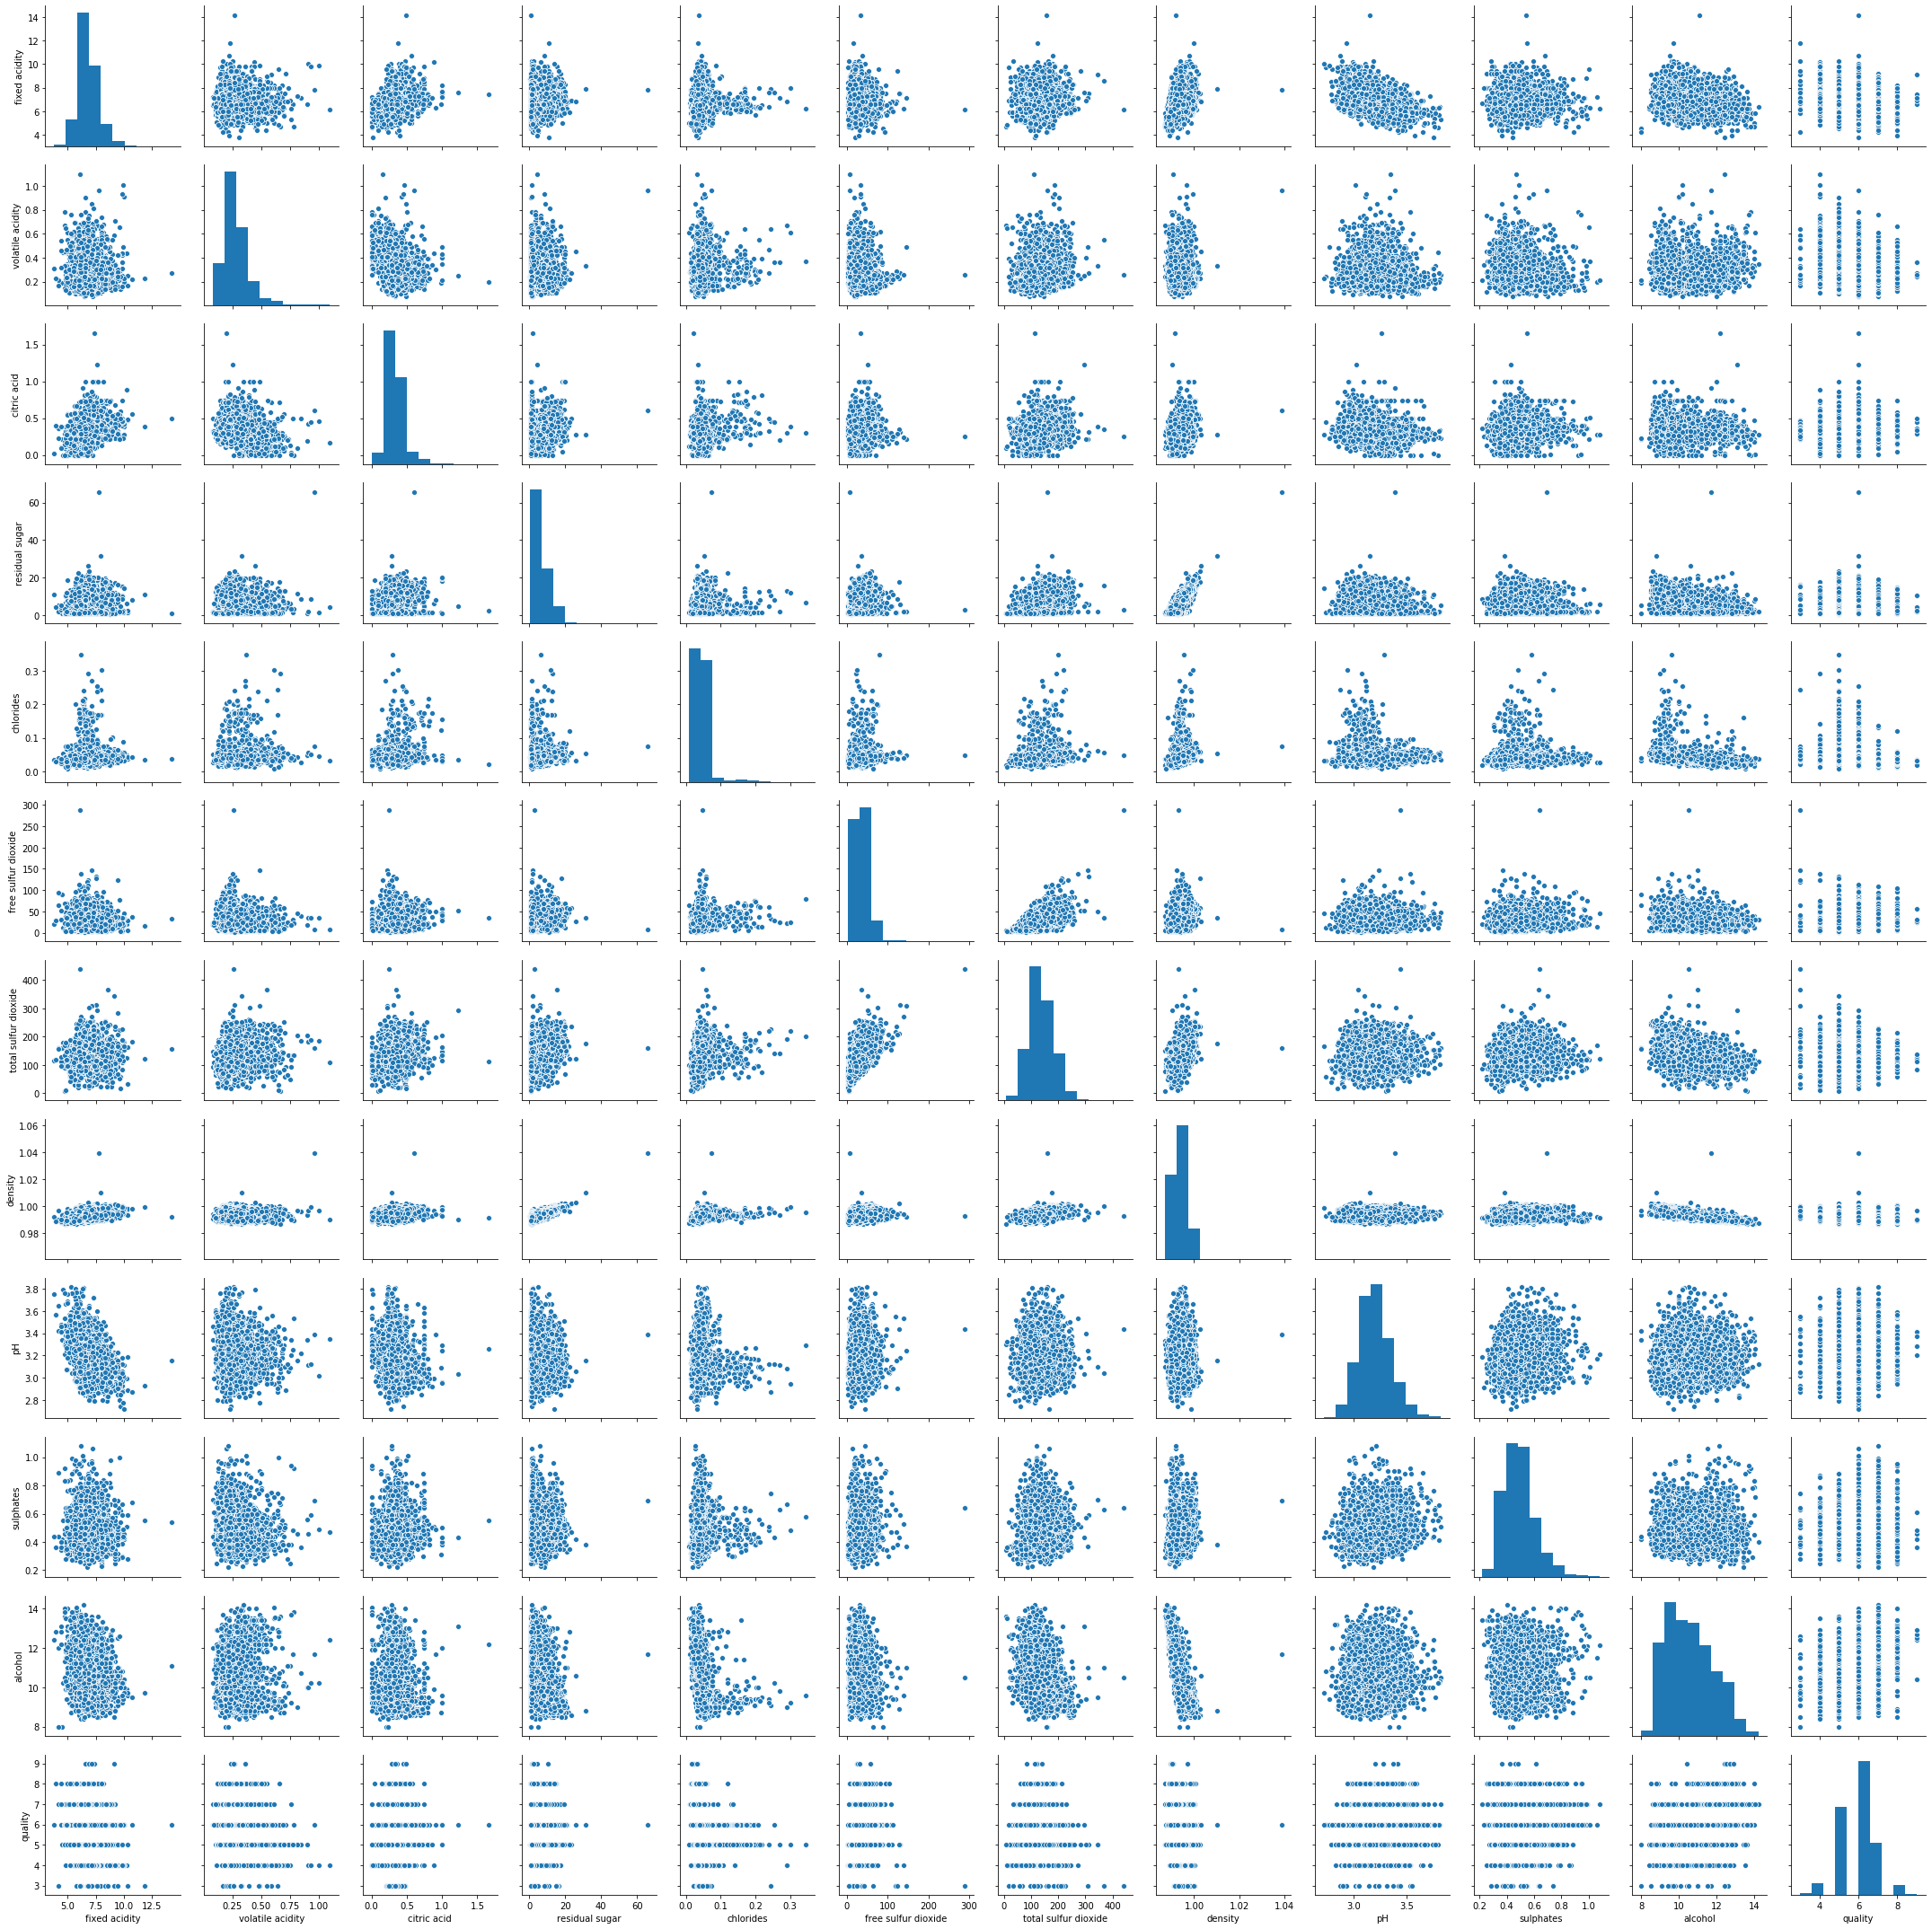

In [107]:
sns.pairplot(df)

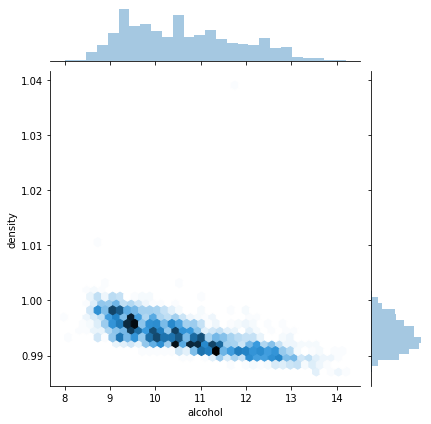

In [108]:
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex")


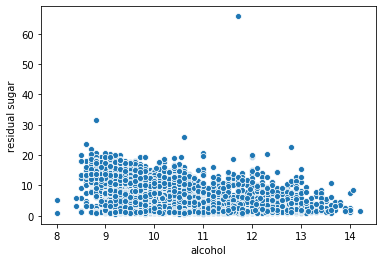

In [109]:
sns.scatterplot(x=df['alcohol'],y=df['residual sugar'])

In [110]:
df[df['residual sugar']>40]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [111]:
df.drop(df[df['residual sugar']>40].index,inplace=True)

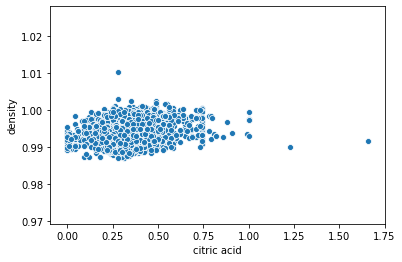

In [112]:
sns.scatterplot(x=df['citric acid'],y=df['density'])

In [113]:
df[(df['density']>=1.005) | (df['citric acid']>=1.1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6
1653,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6


In [114]:
df.drop(df[(df['density']>=1.005) | (df['citric acid']>=1.1)].index,inplace=True)

In [115]:
df.reset_index(drop=True,inplace=True)

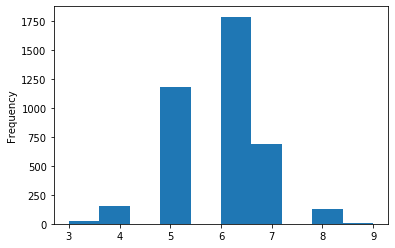

In [116]:
df['quality'].plot(kind='hist')

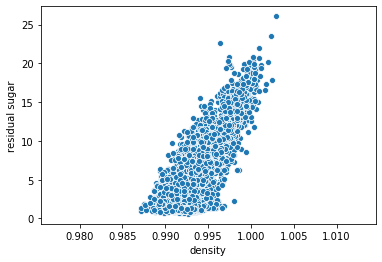

In [117]:
sns.scatterplot(df['density'],df['residual sugar'])

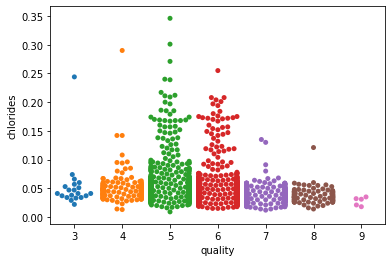

In [118]:
sns.swarmplot(df['quality'],df['chlorides'])

In [119]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>=7:
        category.append("Good")
    else:
        category.append("Mid")

In [120]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [121]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,Mid
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,Mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,Mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Mid
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Mid
3953,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Mid
3954,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Mid
3955,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Good


In [122]:
X = data.drop(['category'],axis=1)
y = data['category']

In [123]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)
##  good=0, med=2, bad=1

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [125]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [126]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\kabeer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kabeer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [128]:
accuracy_score(y_test,y_pred)

0.7676767676767676

In [129]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.02      0.04        52
           1       0.60      0.33      0.43       203
           2       0.79      0.94      0.86       735

    accuracy                           0.77       990
   macro avg       0.80      0.43      0.44       990
weighted avg       0.76      0.77      0.73       990



In [130]:
confusion_matrix(y_test,y_pred)

array([[  1,   1,  50],
       [  0,  68, 135],
       [  0,  44, 691]], dtype=int64)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.12      0.02      0.03        52
           1       0.51      0.41      0.46       203
           2       0.80      0.88      0.84       735

    accuracy                           0.74       990
   macro avg       0.48      0.44      0.44       990
weighted avg       0.70      0.74      0.72       990



In [132]:
accuracy_score(y_test, pred_knn)

0.7414141414141414

In [133]:
confusion_matrix(y_test, pred_knn)

array([[  1,   3,  48],
       [  0,  84, 119],
       [  7,  79, 649]], dtype=int64)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.12      0.02      0.03        52
           1       0.51      0.41      0.46       203
           2       0.80      0.88      0.84       735

    accuracy                           0.74       990
   macro avg       0.48      0.44      0.44       990
weighted avg       0.70      0.74      0.72       990



In [135]:
accuracy = []
for i in range(1,31):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_knn=knn.predict(X_test)
    accuracy.append((i,accuracy_score(y_test, pred_knn)))

Text(0, 0.5, 'Accuracy')

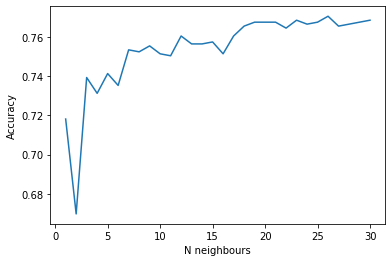

In [136]:
import matplotlib.pyplot as plt
x = list(range(0,31))
x, y = zip(*accuracy)
plt.plot(x, y, label = "Accuracy vs Neighbor count")
plt.xlabel("N neighbours")
plt.ylabel("Accuracy")

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 26)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
accuracy_score(y_test, pred_knn)


0.7707070707070707

In [139]:
confusion_matrix(y_test, pred_knn)

array([[  0,   0,  52],
       [  0,  75, 128],
       [  0,  47, 688]], dtype=int64)

In [142]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.61      0.37      0.46       203
           2       0.79      0.94      0.86       735

    accuracy                           0.77       990
   macro avg       0.47      0.44      0.44       990
weighted avg       0.71      0.77      0.73       990

